# CNN Models on MNIST

### Imports

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import warnings

Using TensorFlow backend.


In [0]:
from matplotlib import pyplot as plt

### Defining epochs and batch size

In [0]:
batch_size = 128
num_classes = 10
epochs = 13

### Pre-processing of Image data

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


### Model 1:

**Planning Architecture of the network. Want to use (5x5) kernels all over the network without any padding at any stage. So the size of layers changes as follows during the network.**
<br/><br/>
***(layer 28x28) --(5x5 kernel)--> (layer 24x24) --(2x2 pooling s-2)--> (layer 12x12) --(5x5 kernel)--> (layer 8x8) --(2x2 pooling s-2)--> (layer 4x4) --(Flatten)--> Dense --> Dense --> Softmax --> y_pred***
<br/><br/>
**Channels of CNN and number of hidden layer units changes as follows.**
<br/><br/>
***(1x28x28) --> (32x24x24) --> (32x12x12) --> (64x8x8) --> (64x4x4) --(Flatten)--> 1024 --> 512 (Dense 1) --> 128 (Dense 2) --> 10 (Softmax)***
<br/><br/>
**I will add dropouts and batch normalization in between so that our model doesnt overfit.**

In [5]:
## Building above model
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu',
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model1 = model
history1 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 16s 265us/step - loss: 0.3246 - acc: 0.9014 - val_loss: 0.0560 - val_acc: 0.9800
Epoch 2/13
60000/60000 [==============================] - 9s 146us/step - loss: 0.1006 - acc: 0.9700 - val_loss: 0.0476 - val_acc: 0.9852
Epoch 3/13
60000/60000 [==============================] - 9s 146us/step - loss: 0.0679 - acc: 0.9803 - val_loss: 0.0325 - val_acc: 0.9887
Epoch 4/13
60000/60000 [==============================] - 9s 152us/step - loss: 0.0541 - acc: 0.9835 - val_loss: 0.0330 - val_acc: 0.9894
Epoch 5/13
60000/60000 [==============================] - 9s 146us/step - loss: 0.0444 - acc: 0.9864 - val_loss: 0.0299 - val_acc: 0.9894
Epoch 6/13
60000/60000 [===================

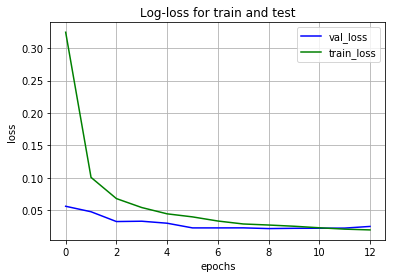

In [6]:
val_loss = history1.history['val_loss']
loss = history1.history['loss']

plt.plot(val_loss, color='b', label='val_loss')
plt.plot(loss, color='g', label='train_loss')
plt.grid()
plt.legend()
plt.title('Log-loss for train and test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**This model did pretty good with loss = 0.02494 and accuracy = 99.36 %. And we can train for more epochs (current epochs = 10) as the model is not overfitting yet. Below is summary of the entire model with all layers included (batch normalization and dropouts)**

In [7]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

### Model 2:

**Will use only (3x3) kernels in the network without any padding at any stage. The convolution part of the network will be deeper than previous model. So the size of layers changes as follows during the network.**
<br/><br/>
***(layer 28x28) --(3x3 kernel)--> (layer 26x26) --(2x2 pooling s-2)--> (layer 13x13) --(3x3 kernel)--> (layer 11x11) --(2x2 pooling s-1)--> (layer 10x10) --(3x3 kernel)--> (layer 8x8) --(2x2 pooling s-2)--> (layer 4x4) --(Flatten)--> Dense --> Dense --> Softmax --> y_pred***
<br/><br/>
**Channels of CNN and number of hidden layer units changes as follows.**
<br/><br/>
***(1x28x28) --> (32x26x26) --> (32x13x13) --> (64x11x11) --> (64x10x10) --> (128x8x8) --> (128x4x4) --(Flatten)--> 2048 --> 512 (Dense 1) --> 128 (Dense 2) --> 10 (Softmax)***
<br/><br/>
**I will add dropouts and batch normalization in between so that our model doesnt overfit.**

In [8]:
## Building above model
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model2 = model
history2 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 13s 210us/step - loss: 0.2487 - acc: 0.9247 - val_loss: 0.0666 - val_acc: 0.9775
Epoch 2/13
60000/60000 [==============================] - 11s 184us/step - loss: 0.0739 - acc: 0.9776 - val_loss: 0.0371 - val_acc: 0.9882
Epoch 3/13
60000/60000 [==============================] - 11s 188us/step - loss: 0.0563 - acc: 0.9829 - val_loss: 0.0413 - val_acc: 0.9885
Epoch 4/13
60000/60000 [==============================] - 11s 182us/step - loss: 0.0442 - acc: 0.9865 - val_loss: 0.0469 - val_acc: 0.9840
Epoch 5/13
60000/60000 [==============================] - 11s 181us/step - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0195 - val_acc: 0.9933
Epoch 6/13
60000/60000 [==============================] - 11s 183us/step - loss: 0.0312 - acc: 0.9904 - val_loss: 0.0303 - val_acc: 0.9902
Epoch 7/13
60000/60000 [==============================] - 11s 187us/step - loss: 0.0294 - acc: 0.9908 - val_loss: 0.

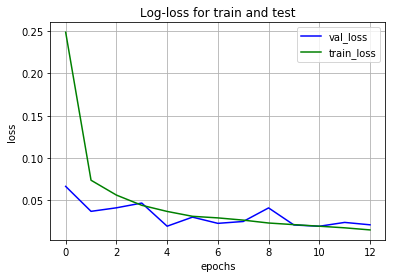

In [9]:
val_loss = history2.history['val_loss']
loss = history2.history['loss']

plt.plot(val_loss, color='b', label='val_loss')
plt.plot(loss, color='g', label='train_loss')
plt.grid()
plt.legend()
plt.title('Log-loss for train and test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**Loss and accuracy are slightly good than the previous model (loss = 0.0212, accuracy = 99.4 %). Not sure we can go for more epochs as validation loss seems to be reducing but not steadily. Have to find out by training more epochs.**

In [10]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 128)        

### Model 3:

**Will use only (7x7) kernels in the network without any padding at any stage. The convolution part of the network will be less deeper than previous model. So the size of layers changes as follows during the network.**
<br/><br/>
***(layer 28x28) --(7x7 kernel)--> (layer 22x22) --(2x2 pooling s-2)--> (layer 11x11) --(7x7 kernel)--> (layer 5x5) --(2x2 pooling s-1)--> (layer 4x4) --(Flatten)--> Dense --> Dense --> Softmax --> y_pred***
<br/><br/>
**Channels of CNN and number of hidden layer units changes as follows.**
<br/><br/>
***(1x28x28) --> (32x22x22) --> (32x11x11) --> (64x5x5) --> (64x4x4) --(Flatten)--> 1024 --> 512 (Dense 1) --> 128 (Dense 2) --> 10 (Softmax)***
<br/><br/>
**I will add dropouts and batch normalization in between so that our model doesnt overfit.**

In [11]:
## Building above model
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(32, kernel_size=(7, 7), activation='relu',
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (7, 7), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model3 = model
history3 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 10s 163us/step - loss: 0.3445 - acc: 0.8952 - val_loss: 0.0629 - val_acc: 0.9800
Epoch 2/13
60000/60000 [==============================] - 9s 143us/step - loss: 0.0863 - acc: 0.9751 - val_loss: 0.0494 - val_acc: 0.9837
Epoch 3/13
60000/60000 [==============================] - 9s 149us/step - loss: 0.0557 - acc: 0.9836 - val_loss: 0.0390 - val_acc: 0.9887
Epoch 4/13
60000/60000 [==============================] - 9s 143us/step - loss: 0.0449 - acc: 0.9870 - val_loss: 0.0289 - val_acc: 0.9918
Epoch 5/13
60000/60000 [==============================] - 9s 146us/step - loss: 0.0348 - acc: 0.9897 - val_loss: 0.0293 - val_acc: 0.9919
Epoch 6/13
60000/60000 [==============================] - 9s 151us/step - loss: 0.0274 - acc: 0.9916 - val_loss: 0.0249 - val_acc: 0.9923
Epoch 7/13
60000/60000 [==============================] - 9s 149us/step - loss: 0.0241 - acc: 0.9927 - val_loss: 0.0289 -

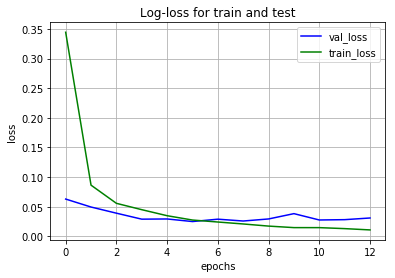

In [12]:
val_loss = history3.history['val_loss']
loss = history3.history['loss']

plt.plot(val_loss, color='b', label='val_loss')
plt.plot(loss, color='g', label='train_loss')
plt.grid()
plt.legend()
plt.title('Log-loss for train and test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**Loss and accuracy are not good compared to previous models (loss = 0.0309 and accuracy = 99.29 %). Validation loss seems to be stagnating compared to train loss which might indicate that furthur epochs may lead to overfitting.**

In [13]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 5, 64)          100416    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)              

### Model 4:

**Let us try models with padding now. (5x5) kernels used with padding (but not for all layers. some layers have (3x3) kernels without padding). The size of layers changes as follows.**
<br/><br/>
***(layer 28x28) --(5x5 kernel)--> (layer 28x28) --(2x2 pooling s-2)--> (layer 14x14) --(5x5 kernel)--> (layer 14x14) --(2x2 pooling s-2)--> (layer 7x7) --(3x3 kernel No Pad)--> (layer 5x5) --(5x5 kernel No Pad)--> (layer 1x1) --(Flatten)--> Dense --> Dense --> Softmax --> y_pred***
<br/><br/>
**Channels of CNN and number of hidden layer units changes as follows.**
<br/><br/>
***(1x28x28) --> (32x28x28) --> (32x14x14) --> (128x14x14) --> (128x7x7) --> (256x5x5) --> (512x1x1) --(Flatten)--> 512 --> 256 (Dense 1) --> 128 (Dense 2) --> 10 (Softmax)***
<br/><br/>
**I will add dropouts and batch normalization in between so that our model doesnt overfit.**

In [14]:
## Building above model
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same',
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu', padding='same',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(512, (5, 5), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model4 = model
history4 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 26s 431us/step - loss: 0.2782 - acc: 0.9191 - val_loss: 0.0375 - val_acc: 0.9885
Epoch 2/13
60000/60000 [==============================] - 23s 385us/step - loss: 0.0611 - acc: 0.9835 - val_loss: 0.0328 - val_acc: 0.9904
Epoch 3/13
60000/60000 [==============================] - 23s 388us/step - loss: 0.0364 - acc: 0.9897 - val_loss: 0.0364 - val_acc: 0.9901
Epoch 4/13
60000/60000 [==============================] - 23s 388us/step - loss: 0.0268 - acc: 0.9922 - val_loss: 0.0334 - val_acc: 0.9904
Epoch 5/13
60000/60000 [==============================] - 23s 388us/step - loss: 0.0192 - acc: 0.9943 - val_loss: 0.0289 - val_acc: 0.9913
Epoch 6/13
60000/60000 [==============================] - 23s 387us/step - loss: 0.0144 - acc: 0.9960 - val_loss: 0.0327 - val_acc: 0.9914
Epoch 7/13
60000/60000 [==============================] - 23s 389us/step - loss: 0.0106 - acc: 0.9970 - val_loss: 0.

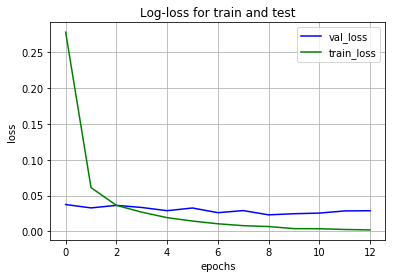

In [15]:
val_loss = history4.history['val_loss']
loss = history4.history['loss']

plt.plot(val_loss, color='b', label='val_loss')
plt.plot(loss, color='g', label='train_loss')
plt.grid()
plt.legend()
plt.title('Log-loss for train and test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**This model seems to be doing good as accuracy values in some epochs is better than other models but there is some overfit in the model as train loss is lot less than validation loss (train at last epoch = 0.002 which is nearly zero)**

In [16]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       102528    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 5, 5, 256)         295168    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 512)         3277312   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 1, 512)        

### Model 5:

**Let us try models with padding now. (3x3) kernels used with padding (but not for all layers. some layers dont have padding). The size of layers changes as follows.**
<br/><br/>
***(layer 28x28) --(3x3 kernel)--> (layer 28x28) --(2x2 pooling s-2)--> (layer 14x14) --(3x3 kernel)--> (layer 14x14) --(2x2 pooling s-2)--> (layer 7x7) --(3x3 kernel No Pad)--> (layer 5x5) --(2x2 pooling s-1)--> (layer 4x4) --(Flatten)--> Dense --> Dense --> Softmax --> y_pred***
<br/><br/>
**Channels of CNN and number of hidden layer units changes as follows.**
<br/><br/>
***(1x28x28) --> (32x28x28) --> (32x14x14) --> (64x14x14) --> (64x7x7) --> (128x5x5) --> (128x4x4) --(Flatten)--> 2048 --> 512 (Dense 1) --> 128 (Dense 2) --> 10 (Softmax)***
<br/><br/>
**I will add dropouts and batch normalization in between so that our model doesnt overfit.**

In [17]:
## Building above model
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model5 = model
history5 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 13s 216us/step - loss: 0.2542 - acc: 0.9228 - val_loss: 0.0701 - val_acc: 0.9753
Epoch 2/13
60000/60000 [==============================] - 11s 177us/step - loss: 0.0726 - acc: 0.9779 - val_loss: 0.0440 - val_acc: 0.9865
Epoch 3/13
60000/60000 [==============================] - 11s 175us/step - loss: 0.0524 - acc: 0.9844 - val_loss: 0.0374 - val_acc: 0.9892
Epoch 4/13
60000/60000 [==============================] - 11s 176us/step - loss: 0.0415 - acc: 0.9869 - val_loss: 0.0300 - val_acc: 0.9899
Epoch 5/13
60000/60000 [==============================] - 10s 175us/step - loss: 0.0367 - acc: 0.9891 - val_loss: 0.0242 - val_acc: 0.9923
Epoch 6/13
60000/60000 [==============================] - 10s 173us/step - loss: 0.0304 - acc: 0.9906 - val_loss: 0.0417 - val_acc: 0.9878
Epoch 7/13
60000/60000 [==============================] - 11s 175us/step - loss: 0.0251 - acc: 0.9924 - val_loss: 0.

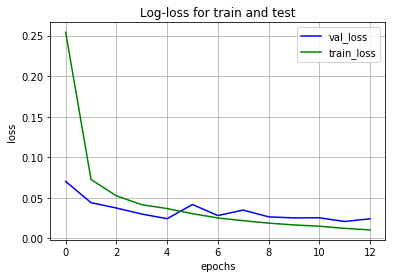

In [18]:
val_loss = history5.history['val_loss']
loss = history5.history['loss']

plt.plot(val_loss, color='b', label='val_loss')
plt.plot(loss, color='g', label='train_loss')
plt.grid()
plt.legend()
plt.title('Log-loss for train and test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**This model is doing good with loss = 0.0241 and accuracy = 99.38 %. And there is not a big overfit problem like previous model. but further epochs may lead to overfitting.**

In [19]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 4, 4, 128)        

### Model 6:

**Let us try models with padding now. (7x7) kernels used with padding (but not for all layers. some layers have (3x3) kernels without padding). The size of layers changes as follows.**
<br/><br/>
***(layer 28x28) --(7x7 kernel)--> (layer 28x28) --(2x2 pooling s-2)--> (layer 14x14) --(7x7 kernel)--> (layer 14x14) --(2x2 pooling s-2)--> (layer 7x7) --(7x7 kernel No Pad)--> (layer 1x1) --(Flatten)--> Dense --> Dense --> Softmax --> y_pred***
<br/><br/>
**Channels of CNN and number of hidden layer units changes as follows.**
<br/><br/>
***(1x28x28) --> (64x28x28) --> (64x14x14) --> (256x14x14) --> (256x7x7) --> (512x1x1) --(Flatten)--> 512 --> 256 (Dense 1) --> 128 (Dense 2) --> 10 (Softmax)***
<br/><br/>
**I will add dropouts and batch normalization in between so that our model doesnt overfit.**

In [20]:
## Building above model
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(64, kernel_size=(7, 7), activation='relu', padding='same',
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (7, 7), activation='relu', padding='same',
                 kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (7, 7), activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model6 = model
history6 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 40s 665us/step - loss: 0.3666 - acc: 0.8933 - val_loss: 0.0437 - val_acc: 0.9867
Epoch 2/13
60000/60000 [==============================] - 36s 601us/step - loss: 0.0617 - acc: 0.9829 - val_loss: 0.0295 - val_acc: 0.9897
Epoch 3/13
60000/60000 [==============================] - 36s 601us/step - loss: 0.0395 - acc: 0.9887 - val_loss: 0.0289 - val_acc: 0.9916
Epoch 4/13
60000/60000 [==============================] - 36s 603us/step - loss: 0.0262 - acc: 0.9926 - val_loss: 0.0304 - val_acc: 0.9896
Epoch 5/13
60000/60000 [==============================] - 36s 603us/step - loss: 0.0227 - acc: 0.9935 - val_loss: 0.0271 - val_acc: 0.9925
Epoch 6/13
60000/60000 [==============================] - 36s 598us/step - loss: 0.0154 - acc: 0.9956 - val_loss: 0.0296 - val_acc: 0.9907
Epoch 7/13
60000/60000 [==============================] - 36s 598us/step - loss: 0.0118 - acc: 0.9965 - val_loss: 0.

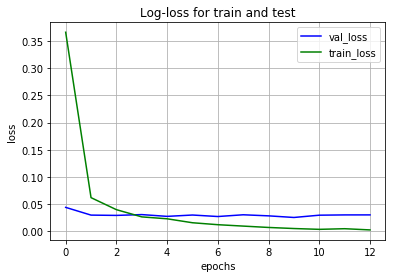

In [21]:
val_loss = history6.history['val_loss']
loss = history6.history['loss']

plt.plot(val_loss, color='b', label='val_loss')
plt.plot(loss, color='g', label='train_loss')
plt.grid()
plt.legend()
plt.title('Log-loss for train and test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**Accuracy of model is good but the loss is not reducing further. This model is good with fewer epochs which can be used to classify. Further epochs may overfit the model**

In [22]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 256)       803072    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 1, 512)         6423040   
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 512)              

### Model 7:

**Let us try models with less frequent pooling (for every 2 convolution layer 1 maxpool layer). Not using padding as it gives lot of parameters which seems to be reducing performance of the model. kernels of all sizes are used. The size of layers changes as follows.**
<br/><br/>
***(layer 28x28) --(5x5 kernel)--> (layer 24x24) --(3x3 kernel)--> (layer 22x22) --(2x2 pooling s-2)--> (layer 11x11) --(5x5 kernel)--> (layer 7x7) --(3x3 kernel)--> (layer 5x5) --(2x2 pooling s-1)--> (layer 4x4) --(Flatten)--> Dense --> Dense --> Softmax --> y_pred***
<br/><br/>
**Channels of CNN and number of hidden layer units changes as follows.**
<br/><br/>
***(1x28x28) --> (32x24x24) --> (64x22x22) --> (64x11x11) --> (128x7x7) --> (256x5x5) --> (256x4x4) --(Flatten)--> 4096 --> 512 (Dense 1) --> 128 (Dense 2) --> 10 (Softmax)***
<br/><br/>
**I will add dropouts and batch normalization in between so that our model doesnt overfit.**

In [23]:
## Building above model
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu',
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model7 = model
history7 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 19s 325us/step - loss: 0.2210 - acc: 0.9333 - val_loss: 0.0604 - val_acc: 0.9795
Epoch 2/13
60000/60000 [==============================] - 17s 285us/step - loss: 0.0573 - acc: 0.9835 - val_loss: 0.0392 - val_acc: 0.9875
Epoch 3/13
60000/60000 [==============================] - 17s 287us/step - loss: 0.0387 - acc: 0.9889 - val_loss: 0.0275 - val_acc: 0.9925
Epoch 4/13
60000/60000 [==============================] - 17s 287us/step - loss: 0.0299 - acc: 0.9913 - val_loss: 0.0235 - val_acc: 0.9934
Epoch 5/13
60000/60000 [==============================] - 17s 287us/step - loss: 0.0231 - acc: 0.9933 - val_loss: 0.0198 - val_acc: 0.9940
Epoch 6/13
60000/60000 [==============================] - 17s 284us/step - loss: 0.0182 - acc: 0.9948 - val_loss: 0.0178 - val_acc: 0.9945
Epoch 7/13
60000/60000 [==============================] - 17s 286us/step - loss: 0.0137 - acc: 0.9960 - val_loss: 0.

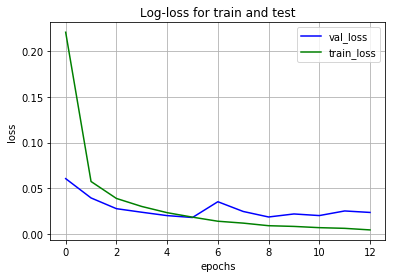

In [24]:
val_loss = history7.history['val_loss']
loss = history7.history['loss']

plt.plot(val_loss, color='b', label='val_loss')
plt.plot(loss, color='g', label='train_loss')
plt.grid()
plt.legend()
plt.title('Log-loss for train and test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**Best model seen so far. the accuracy is very good and its not randomly good for only one epoch i.e. last few epochs have good accuracy scores which are above 99.4 %. But there seems to be slight overfit problem. further training may harm the performance**

In [25]:
model7.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 5, 5, 256)         295168    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 4, 4, 256)        

### Model 8:

**Let us try models with less frequent pooling (for every 2 convolution layer 1 maxpool layer). Not using padding much as it gives lot of parameters which seems to be reducing performance of the model. kernels of different sizes are used. The size of layers changes as follows.**
<br/><br/>
***(layer 28x28) --(5x5 kernel padding)--> (layer 28x28) --(5x5 kernel)--> (layer 24x24) --(2x2 pooling s-2)--> (layer 12x12) --(3x3 kernel)--> (layer 10x10) --(3x3 kernel)--> (layer 8x8) --(2x2 pooling s-2)--> (layer 4x4) --(Flatten)--> Dense --> Dense --> Softmax --> y_pred***
<br/><br/>
**Channels of CNN and number of hidden layer units changes as follows.**
<br/><br/>
***(1x28x28) --> (32x28x28) --> (64x24x24) --> (64x12x12) --> (128x10x10) --> (256x8x8) --> (256x4x4) --(Flatten)--> 4096 --> 512 (Dense 1) --> 128 (Dense 2) --> 10 (Softmax)***
<br/><br/>
**I will add dropouts and batch normalization in between so that our model doesnt overfit.**

In [26]:
## Building above model
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', padding='same',
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model8 = model
history8 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 21s 350us/step - loss: 0.2238 - acc: 0.9327 - val_loss: 0.0868 - val_acc: 0.9722
Epoch 2/13
60000/60000 [==============================] - 18s 303us/step - loss: 0.0647 - acc: 0.9811 - val_loss: 0.0332 - val_acc: 0.9896
Epoch 3/13
60000/60000 [==============================] - 18s 306us/step - loss: 0.0434 - acc: 0.9873 - val_loss: 0.0338 - val_acc: 0.9905
Epoch 4/13
60000/60000 [==============================] - 18s 302us/step - loss: 0.0349 - acc: 0.9898 - val_loss: 0.0256 - val_acc: 0.9918
Epoch 5/13
60000/60000 [==============================] - 18s 302us/step - loss: 0.0298 - acc: 0.9911 - val_loss: 0.0165 - val_acc: 0.9945
Epoch 6/13
60000/60000 [==============================] - 18s 302us/step - loss: 0.0232 - acc: 0.9932 - val_loss: 0.0255 - val_acc: 0.9926
Epoch 7/13
60000/60000 [==============================] - 18s 302us/step - loss: 0.0198 - acc: 0.9938 - val_loss: 0.

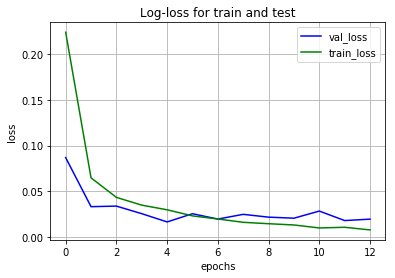

In [27]:
val_loss = history8.history['val_loss']
loss = history8.history['loss']

plt.plot(val_loss, color='b', label='val_loss')
plt.plot(loss, color='g', label='train_loss')
plt.grid()
plt.legend()
plt.title('Log-loss for train and test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**This model is also pretty good. The test loss of model is very low. Accuracy reached 99.5 %. but further training may give good accuracy or overfit problems**

In [28]:
model8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 4, 4, 256)        

### Model 9:

**Let us try one another model with less frequent pooling (for every 2 convolution layer 1 maxpool layer). In previous model we used 5x5 in early layers and 3x3 in later layers. Now we reverse this**
<br/><br/>
***(layer 28x28) --(3x3 kernel padding)--> (layer 28x28) --(3x3 kernel)--> (layer 26x26) --(2x2 pooling s-2)--> (layer 13x13) --(5x5 kernel)--> (layer 9x9) --(5x5 kernel)--> (layer 5x5) --(2x2 pooling s-1)--> (layer 4x4) --(Flatten)--> Dense --> Dense --> Softmax --> y_pred***
<br/><br/>
**Channels of CNN and number of hidden layer units changes as follows.**
<br/><br/>
***(1x28x28) --> (32x28x28) --> (64x26x26) --> (64x13x13) --> (128x9x9) --> (256x5x5) --> (256x4x4) --(Flatten)--> 4096 --> 512 (Dense 1) --> 128 (Dense 2) --> 10 (Softmax)***
<br/><br/>
**I will add dropouts and batch normalization in between so that our model doesnt overfit.**

In [29]:
## Building above model
warnings.filterwarnings('ignore')
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same',
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_normal'))
model.add(Conv2D(256, (5, 5), activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model9 = model
history9 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 25s 420us/step - loss: 0.2029 - acc: 0.9383 - val_loss: 0.0348 - val_acc: 0.9884
Epoch 2/13
60000/60000 [==============================] - 22s 367us/step - loss: 0.0518 - acc: 0.9850 - val_loss: 0.0426 - val_acc: 0.9868
Epoch 3/13
60000/60000 [==============================] - 22s 367us/step - loss: 0.0335 - acc: 0.9900 - val_loss: 0.0308 - val_acc: 0.9913
Epoch 4/13
60000/60000 [==============================] - 22s 367us/step - loss: 0.0250 - acc: 0.9926 - val_loss: 0.0233 - val_acc: 0.9937
Epoch 5/13
60000/60000 [==============================] - 22s 366us/step - loss: 0.0210 - acc: 0.9942 - val_loss: 0.0251 - val_acc: 0.9928
Epoch 6/13
60000/60000 [==============================] - 22s 370us/step - loss: 0.0169 - acc: 0.9947 - val_loss: 0.0249 - val_acc: 0.9928
Epoch 7/13
60000/60000 [==============================] - 22s 365us/step - loss: 0.0120 - acc: 0.9964 - val_loss: 0.

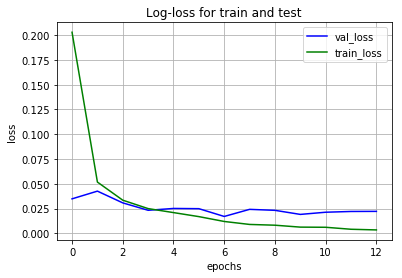

In [30]:
val_loss = history9.history['val_loss']
loss = history9.history['loss']

plt.plot(val_loss, color='b', label='val_loss')
plt.plot(loss, color='g', label='train_loss')
plt.grid()
plt.legend()
plt.title('Log-loss for train and test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**This model gave good accuracy and loss but the model is overfitting. So further training may give bad results.**

In [31]:
model9.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 9, 9, 128)         204928    
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 5, 5, 256)         819456    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 4, 4, 256)        

### Model 10:

**Trying to build a model similar to inception (not exactly similar) to see the effect on the model's performance. Architecture looks as below.**
<br/><br/>
**First we form 4 individual layers as follows from input.**<br/><br/>
***(1x28x28 input) --(1x1 kernel)--> (32x28x28) - layer1<br/>
(1x28x28 input) --(3x3 kernel pad)--> (32x28x28) - layer2<br/>
(1x28x28 input) --(5x5 kernel pad)--> (32x28x28) - layer3<br/>
(1x28x28 input) --(1x1 kernel)--> (32x28x28) --(3x3 pooling s-1 pad)--> (32x28x28) - layer4***
<br/><br/>
**Now above layers will be merged to form single layer and this will be fed for next layers which are as follows. (below kernels have no padding)**<br/><br/>
***4 layers merged --> (128x28x28) --(7x7 kernel)--> (256x22x22) --(2x2 pooling s-2)--> (256x11x11) --(5x5 kernel)--> (512x7x7) --(5x5 kernel)--> (1024x3x3) --(3x3 kernel)--> (2048x1x1) --(Flatten)--> 2048 --> 512 (Dense) --> 128 (Dense) --> 10 (Softmax)***

In [37]:
## Building above model
warnings.filterwarnings('ignore')

## layer 1
input_layer = keras.layers.Input(shape=input_shape)
layer_1 = Conv2D(32, (1, 1), padding='same', activation='relu',
                 kernel_initializer='he_normal')(input_layer)

# layer 2
layer_2 = Conv2D(32, (3, 3), padding='same', activation='relu',
                 kernel_initializer='he_normal')(input_layer)

# layer 3
layer_3 = Conv2D(32, (5, 5), padding='same', activation='relu',
                 kernel_initializer='he_normal')(input_layer)

# layer 4
layer_4 = Conv2D(32, (1, 1), padding='same', activation='relu',
                 kernel_initializer='he_normal')(input_layer)
layer_4 = MaxPooling2D(pool_size=(3, 3), padding='same', strides=(1, 1))(layer_4)

# final CNN
merged_layers = keras.layers.Concatenate(axis=-1)([layer_1, layer_2, layer_3, layer_4])
cl1 = Conv2D(256, (7, 7), activation='relu', kernel_initializer='he_normal')(merged_layers)
cl2 = MaxPooling2D(pool_size=(2, 2))(cl1)
cl3 = Conv2D(512, (5, 5), activation='relu', kernel_initializer='he_normal')(cl2)
cl4 = Conv2D(1024, (5, 5), activation='relu', kernel_initializer='he_normal')(cl3)
cl5 = Conv2D(2048, (3, 3), activation='relu', kernel_initializer='he_normal')(cl4)
cl6 = Dropout(0.25)(cl5)
l1 = Flatten()(cl6)
l2 = Dense(512, activation='relu', kernel_initializer='he_normal')(l1)
l3 = BatchNormalization()(l2)
l4 = Dropout(0.5)(l3)
l5 = Dense(128, activation='relu', kernel_initializer='he_normal')(l4)
l6 = BatchNormalization()(l5)
l7 = Dropout(0.5)(l6)
output_layer = Dense(num_classes, activation='softmax')(l7)

model = keras.models.Model(inputs = input_layer, outputs = output_layer)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model10 = model
history10 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 156s 3ms/step - loss: 0.5174 - acc: 0.8457 - val_loss: 0.0573 - val_acc: 0.9828
Epoch 2/13
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0563 - acc: 0.9847 - val_loss: 0.0436 - val_acc: 0.9874
Epoch 3/13
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0367 - acc: 0.9897 - val_loss: 0.0307 - val_acc: 0.9913
Epoch 4/13
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0287 - acc: 0.9918 - val_loss: 0.0281 - val_acc: 0.9919
Epoch 5/13
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0224 - acc: 0.9937 - val_loss: 0.0255 - val_acc: 0.9928
Epoch 6/13
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0195 - acc: 0.9946 - val_loss: 0.0235 - val_acc: 0.9936
Epoch 7/13
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0143 - acc: 0.9963 - val_loss: 0.0266 - 

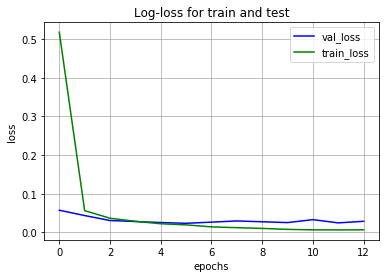

In [38]:
val_loss = history10.history['val_loss']
loss = history10.history['loss']

plt.plot(val_loss, color='b', label='val_loss')
plt.plot(loss, color='g', label='train_loss')
plt.grid()
plt.legend()
plt.title('Log-loss for train and test')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

**Even when we built complex model this didnt do as good as last 3 models (models 7, 8, 9). And results can be comparable to first 6 models. Overfitting is not as bad as other models which is good**

In [39]:
model10.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_49 (Conv2D)              (None, 28, 28, 32)   64          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_46 (Conv2D)              (None, 28, 28, 32)   64          input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 28, 28, 32)   320         input_3[0][0]                    
____________________________________________________________________________________________

## Conclusion:

In [7]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ['Model number', 'Model Description', 'Train loss', 'Validation loss', 'Train accuracy', 'Test accuracy']
table.add_row(['Model 1', '5x5 no padding', 0.0196, 0.0249, '99.41 %', '99.36 %'])
table.add_row(['Model 2', '3x3 no padding', 0.0151, 0.0212, '99.52 %', '99.40 %'])
table.add_row(['Model 3', '7x7 no padding', 0.0108, 0.0309, '99.69 %', '99.29 %'])
table.add_row(['Model 4', '5x5 with padding', 0.0020, 0.0288, '99.94 %', '99.37 %'])
table.add_row(['Model 5', '3x3 with padding', 0.0104, 0.0241, '99.68 %', '99.38 %'])
table.add_row(['Model 6', '7x7 with padding', 0.0022, 0.0299, '99.94 %', '99.38 %'])
table.add_row(['Model 7', 'Maxpool less freq', 0.0042, 0.0233, '99.88 %', '99.48 %'])
table.add_row(['Model 8', 'Maxpool less freq', 0.0078, 0.0196, '99.79 %', '99.51 %'])
table.add_row(['Model 9', 'Maxpool less freq', 0.0035, 0.0222, '99.88 %', '99.54 %'])
table.add_row(['Model 10', 'Inception type model', 0.0067, 0.0287, '99.80 %', '99.44 %'])
print(table)

+--------------+----------------------+------------+-----------------+----------------+---------------+
| Model number |  Model Description   | Train loss | Validation loss | Train accuracy | Test accuracy |
+--------------+----------------------+------------+-----------------+----------------+---------------+
|   Model 1    |    5x5 no padding    |   0.0196   |      0.0249     |    99.41 %     |    99.36 %    |
|   Model 2    |    3x3 no padding    |   0.0151   |      0.0212     |    99.52 %     |    99.40 %    |
|   Model 3    |    7x7 no padding    |   0.0108   |      0.0309     |    99.69 %     |    99.29 %    |
|   Model 4    |   5x5 with padding   |   0.002    |      0.0288     |    99.94 %     |    99.37 %    |
|   Model 5    |   3x3 with padding   |   0.0104   |      0.0241     |    99.68 %     |    99.38 %    |
|   Model 6    |   7x7 with padding   |   0.0022   |      0.0299     |    99.94 %     |    99.38 %    |
|   Model 7    |  Maxpool less freq   |   0.0042   |      0.0233

**Conclusion:**
- **Accuracy wise models 7, 8, 9 are doing good. These models have less frequent Maxpooling layers than previous ones i.e. for every 2 Convolution layers there is a Maxpool layer. These models are overfitting slightly**
- **Models 1, 2 have less overfitting and good for futher training for few more epochs. These models accuracy and losses are not that good but can be improved by further training. These models have 5x5 and 3x3 kernel layers respectively with no padding in any layers**
- **Models with high padding layers (models 4, 5, 6) are not performing well as they are overfitting very easily and train accuracy is very high for two of these models. Accuracy is good but will not improve for further training**
- **Model 10 has slightly complex architecture (little bit similar to inception model). This model did good but not as good as 7, 8, 9 models. So its better to prefer one of 7, 8, 9 models as model 10 has lot of parameters (around ~37.9 Million) which gives low latency.**
- **Some models accuracy and losses are fluctuating a lot so final loss and accuracy are not best way to analyse the model. Above analysis done by seeing previous epoch scores.**

**Architectures of all 10 models are again printed below:**

1. ***(1x28x28) --(5x5 kernel)--> (32x24x24) --(2x2 pooling s-2)--> (32x12x12) --(5x5 kernel)--> (64x8x8) --(2x2 pooling s-2)--> (64x4x4) --(Flatten)--> 1024 --> 512 --> 128 --> 10***
<br/><br/>
2. ***(1x28x28) --(3x3 kernel)--> (32x26x26) --(2x2 pooling s-2)--> (32x13x13) --(3x3 kernel)--> (64x11x11) --(2x2 pooling s-1)--> (64x10x10) --(3x3 kernel)--> (128x8x8) --(2x2 pooling s-2)--> (128x4x4) --(Flatten)--> 2048 --> 512 --> 128 --> 10***
<br/><br/>
3. ***(1x28x28) --(7x7 kernel)--> (32x22x22) --(2x2 pooling s-2)--> (32x11x11) --(7x7 kernel)--> (64x5x5) --(2x2 pooling s-1)--> (64x4x4) --(Flatten)--> 1024 --> 512 --> 128 --> 10***
<br/><br/>
4. ***(1x28x28) --(5x5 kernel)--> (32x28x28) --(2x2 pooling s-2)--> (32x14x14) --(5x5 kernel)--> (128x14x14) --(2x2 pooling s-2)--> (128x7x7) --(3x3 kernel)--> (256x5x5) --(5x5 kernel)--> (512x1x1) --(Flatten)--> 512 --> 256 --> 128 --> 10***
<br/><br/>
5. ***(1x28x28) --(3x3 kernel)--> (32x28x28) --(2x2 pooling s-2)--> (32x14x14) --(3x3 kernel)--> (64x14x14) --(2x2 pooling s-2)--> (64x7x7) --(3x3 kernel)--> (128x5x5) --(2x2 pooling s-1)--> (128x4x4) --(Flatten)--> 2048 --> 512 --> 128 --> 10***
<br/><br/>
6. ***(1x28x28) --(7x7 kernel)--> (64x28x28) --(2x2 pooling s-2)--> (64x14x14) --(7x7 kernel)--> (256x14x14) --(2x2 pooling s-2)--> (256x7x7) --(7x7 kernel)--> (512x1x1) --(Flatten)--> 512 --> 256 --> 128 --> 10***
<br/><br/>
7. ***(1x28x28) --(5x5 kernel)--> (32x24x24) --(3x3 kernel)--> (64x22x22) --(2x2 pooling s-2)--> (64x11x11) --(5x5 kernel)--> (128x7x7) --(3x3 kernel)--> (256x5x5) --(2x2 pooling s-1)--> (256x4x4) --(Flatten)--> 4096 --> 512 --> 128 --> 10***
<br/><br/>
8. ***(1x28x28) --(5x5 kernel)--> (32x28x28) --(5x5 kernel)--> (64x24x24) --(2x2 pooling s-2)--> (64x12x12) --(3x3 kernel)--> (128x10x10) --(3x3 kernel)--> (256x8x8) --(2x2 pooling s-2)--> (256x4x4) --(Flatten)--> 4096 --> 512 --> 128 --> 10***
<br/><br/>
9. ***(1x28x28) --(3x3 kernel)--> (32x28x28) --(3x3 kernel)--> (64x26x26) --(2x2 pooling s-2)--> (64x13x13) --(5x5 kernel)--> (128x9x9) --(5x5 kernel)--> (256x5x5) --(2x2 pooling s-1)--> (256x4x4) --(Flatten)--> 4096 --> 512 --> 128 --> 10***
<br/><br/>

**Model 10:**<br/><br/>
***(1x28x28 input) --(1x1 kernel)--> (32x28x28) - layer1<br/>
(1x28x28 input) --(3x3 kernel pad)--> (32x28x28) - layer2<br/>
(1x28x28 input) --(5x5 kernel pad)--> (32x28x28) - layer3<br/>
(1x28x28 input) --(1x1 kernel)--> (32x28x28) --(3x3 pooling s-1 pad)--> (32x28x28) - layer4***
<br/><br/>
**Now above layers will be merged to form single layer and this will be fed for next layers which are as follows. (below kernels have no padding)**<br/><br/>
***4 layers merged --> (128x28x28) --(7x7 kernel)--> (256x22x22) --(2x2 pooling s-2)--> (256x11x11) --(5x5 kernel)--> (512x7x7) --(5x5 kernel)--> (1024x3x3) --(3x3 kernel)--> (2048x1x1) --(Flatten)--> 2048 --> 512 (Dense) --> 128 (Dense) --> 10 (Softmax)***

**Batch Normalization layers and dropout layers are not mentioned in above architectures.**